# Task 4

# EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [2]:
df = pd.read_csv('spam.csv',encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Exploratary Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1,inplace = True)

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.rename(columns={"v1": "Target","v2": "Text"}, inplace = True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(keep = 'first',inplace = True)

In [10]:
df.shape

(5169, 2)

<AxesSubplot:xlabel='Target', ylabel='count'>

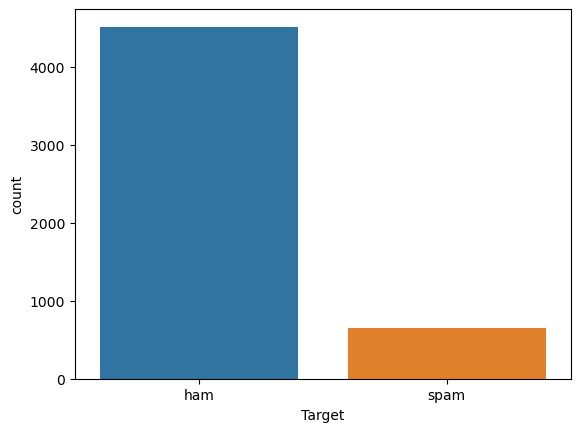

In [11]:
sns.countplot(df['Target'])

In [12]:
LE = LabelEncoder()

df['Target'] = LE.fit_transform(df['Target'])
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

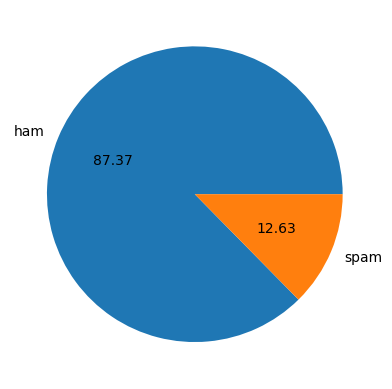

In [13]:
plt.pie(df['Target'].value_counts(),autopct='%0.2f',labels=['ham','spam'])
plt.show()

In [14]:
# Total No. of Characters in Data
df["characters"] = df["Text"].apply(len)
# Total No. of Words in Data
df["word"] = df["Text"].apply(lambda x:len( nltk.word_tokenize(x)))
# Total No. of Sentence
df["sentence"] = df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,Target,Text,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


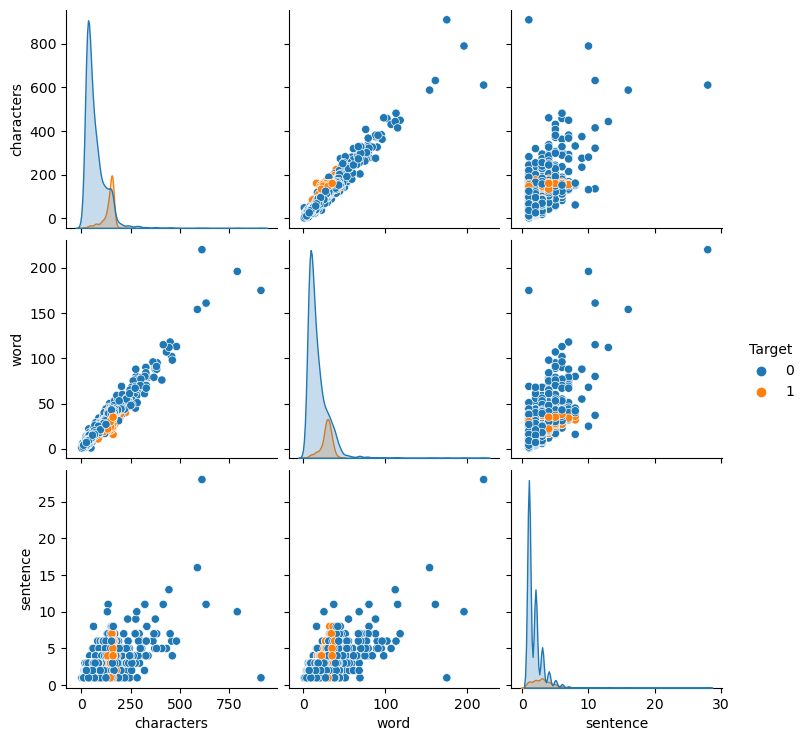

In [15]:
sns.pairplot(df,hue="Target")

<AxesSubplot:>

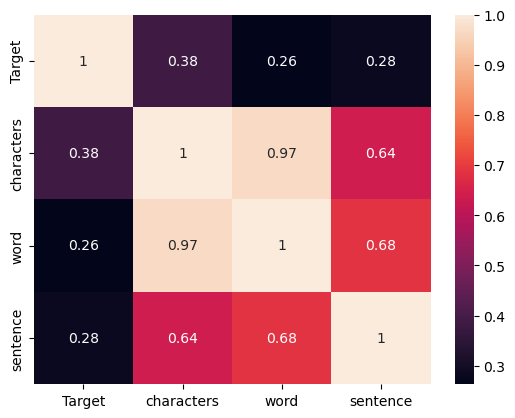

In [16]:
sns.heatmap(df.corr(),annot = True)

In [17]:
# Lowercase the text and remove punctuation.
df['Text'] = df['Text'].str.lower().str.replace('[^\w\s]', '')

# Download stopwords from NLTK and remove them from the text.
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['new_input'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ambat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df

,Target,Text,characters,word,sentence,new_input
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say early hor u c already say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goes usf lives around though
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u u å750 pound prize ...
5568,0,will ì_ b going to esplanade fr home,37,9,1,ì_ b going esplanade fr home
5569,0,pity was in mood for that soany other suggest...,57,15,2,pity mood soany suggestions
5570,0,the guy did some bitching but i acted like id ...,125,27,1,guy bitching acted like id interested buying s...


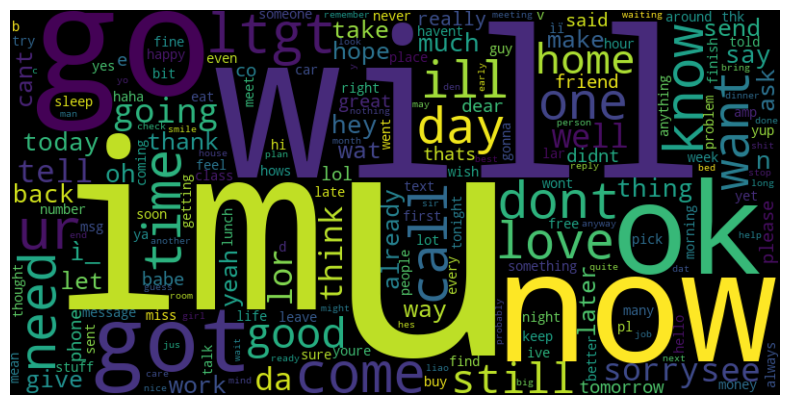

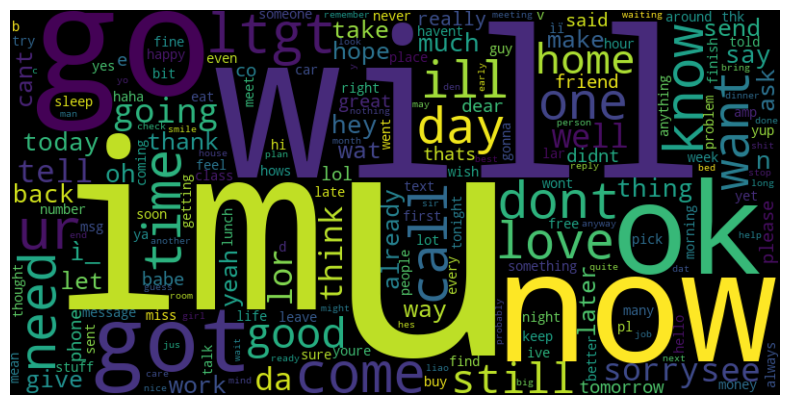

In [19]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)


# Wordcloud for SPAM
spam_wc = wc.generate(df[df["Target"] ==1]["Text"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["Target"] ==0]["Text"].str.cat(sep=" "))
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

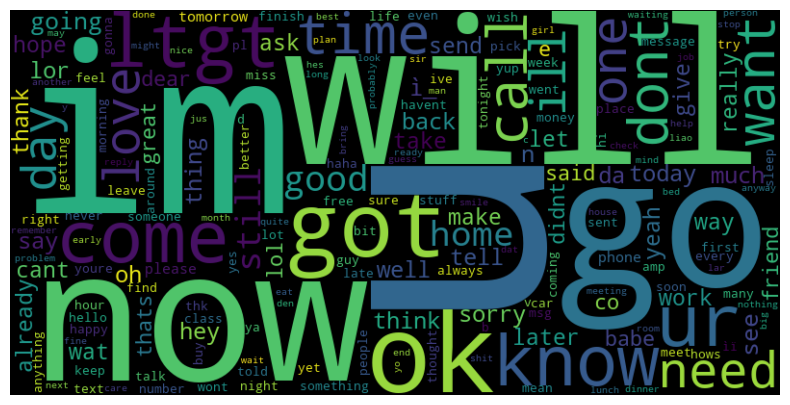

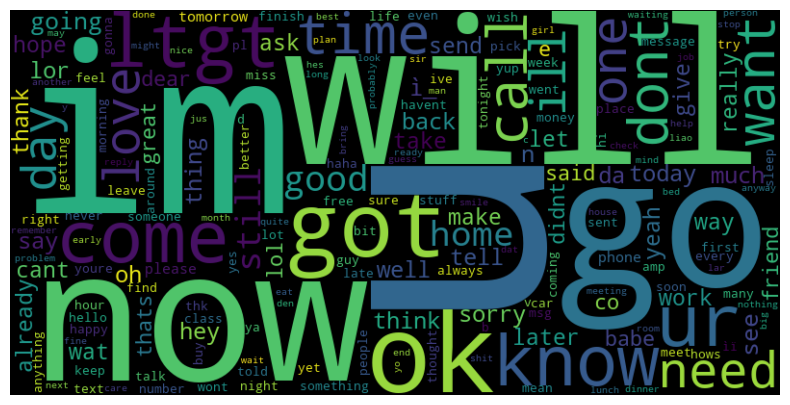

In [20]:
# Wordcloud for SPAM
spam_wc_1 = wc.generate(df[df["Target"] ==1]["Text"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc_1 = wc.generate(df[df["Target"] ==0]["Text"].str.cat(sep=" "))
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc_1, interpolation="bilinear")
plt.axis("off")
plt.show()
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc_1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
x = df['Text']
y = df['Target']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
tfidf_vectorizer = TfidfVectorizer()
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)
print(xtrain_tfidf)
print(xtest_tfidf)

  (0, 3897)	0.5942121235598992
  (0, 2819)	0.5311533100428042
  (0, 4932)	0.2193695280291282
  (0, 7883)	0.36014288771115976
  (0, 7253)	0.4323912858145411
  (1, 7212)	0.43386305595808833
  (1, 5257)	0.47233387091060275
  (1, 7245)	0.4108305101965002
  (1, 780)	0.4848884787956034
  (1, 7903)	0.42984301563278154
  (2, 7296)	0.28353449951161386
  (2, 5030)	0.35348672555950095
  (2, 5229)	0.2661896008784042
  (2, 4425)	0.5697244583420985
  (2, 7754)	0.5697244583420985
  (2, 7212)	0.27317851664748727
  (3, 1673)	0.2744301326820843
  (3, 5302)	0.11625172662906923
  (3, 49)	0.26154300071358394
  (3, 4804)	0.2174816054870084
  (3, 1670)	0.11073207938645858
  (3, 7506)	0.22662517113179576
  (3, 246)	0.2202471383913272
  (3, 4755)	0.18438047482094808
  (3, 5151)	0.26154300071358394
  :	:
  (4133, 7193)	0.20553750255710077
  (4133, 4430)	0.23857941038372854
  (4133, 1717)	0.1993885775505395
  (4133, 6851)	0.19404414095240022
  (4133, 5198)	0.1354857897954436
  (4133, 7296)	0.17581733638501493
  

In [23]:
# Models that are going to be trained
models={
    "Gaussian NB" : GaussianNB(),
    "Multinomial NB" : MultinomialNB(),
    "Bernoulli NB" : BernoulliNB(),
    "Logistic Regression" : LogisticRegression(),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNN" : KNeighborsClassifier(),
    "Bagging CLF" : BaggingClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "ETC" : ExtraTreesClassifier(),
    "Ada Boost" : AdaBoostClassifier(),
    "Gradient Boost" : GradientBoostingClassifier(),
    "XGB" : XGBClassifier(),
}

In [24]:
# Initilizing TFIDF Vectorizer
tfidv = TfidfVectorizer(max_features=3000)
# Independent Feature
X = tfidv.fit_transform(df["new_input"]).toarray()
# Dependent Feature
Y = df["Target"].values
# Performing Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
# Creating a function train each model and calculate/return accuracy and precision
def train_clf (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [25]:
acc_s=[]
pre_s=[]

for name, model in models.items():
    accuracy, precision = train_clf(model, X_train, Y_train, X_test, Y_test)
    
    acc_s.append(accuracy)
    pre_s.append(precision)

# Result

In [26]:
# As Precision matter over Accuracy in this Data, Sorting in DESC order of Precision. All Scores of Models

scores_df = pd.DataFrame({"Algorithm": models.keys(), 
                          "Accuracy": acc_s, 
                         "Precision": pre_s}).sort_values(by="Precision", ascending=False)
scores_df

,Algorithm,Accuracy,Precision
1,Multinomial NB,0.971954,1.000000
2,Bernoulli NB,0.981625,1.000000
6,KNN,0.904255,1.000000
8,Random Forest,0.974855,0.991228
4,SVC,0.970986,0.990909
3,Logistic Regression,0.954545,0.978947
9,ETC,0.974855,0.974576
12,XGB,0.972921,0.966102
10,Ada Boost,0.958414,0.952381
11,Gradient Boost,0.958414,0.943925
